## Waste Classification using CNN

In [ ]:
pip install opencv-python

In [ ]:
pip install tensorflow

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [5]:
train_path = "DATASET/TRAIN"
test_path = "DATASET/TEST"

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [7]:
from cv2 import cvtColor 
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
    data = pd.DataFrame({'image' :x_data, 'label' :y_data})

100%|██████████| 9999/9999 [00:12<00:00, 803.10it/s] 


In [8]:
data.shape

(22564, 2)

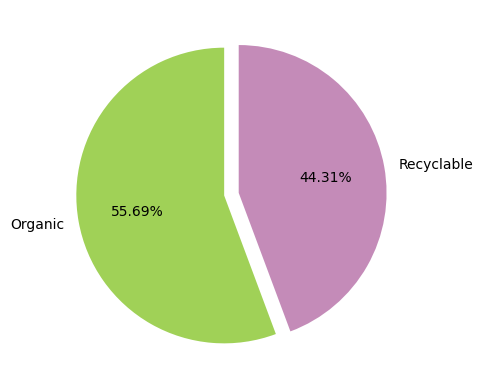

In [9]:
colors = ['#a0d157' , '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic' , 'Recyclable'] , autopct ='%0.2f%%' , colors = colors, startangle = 90, explode =[0.05, 0.05])
plt.show()

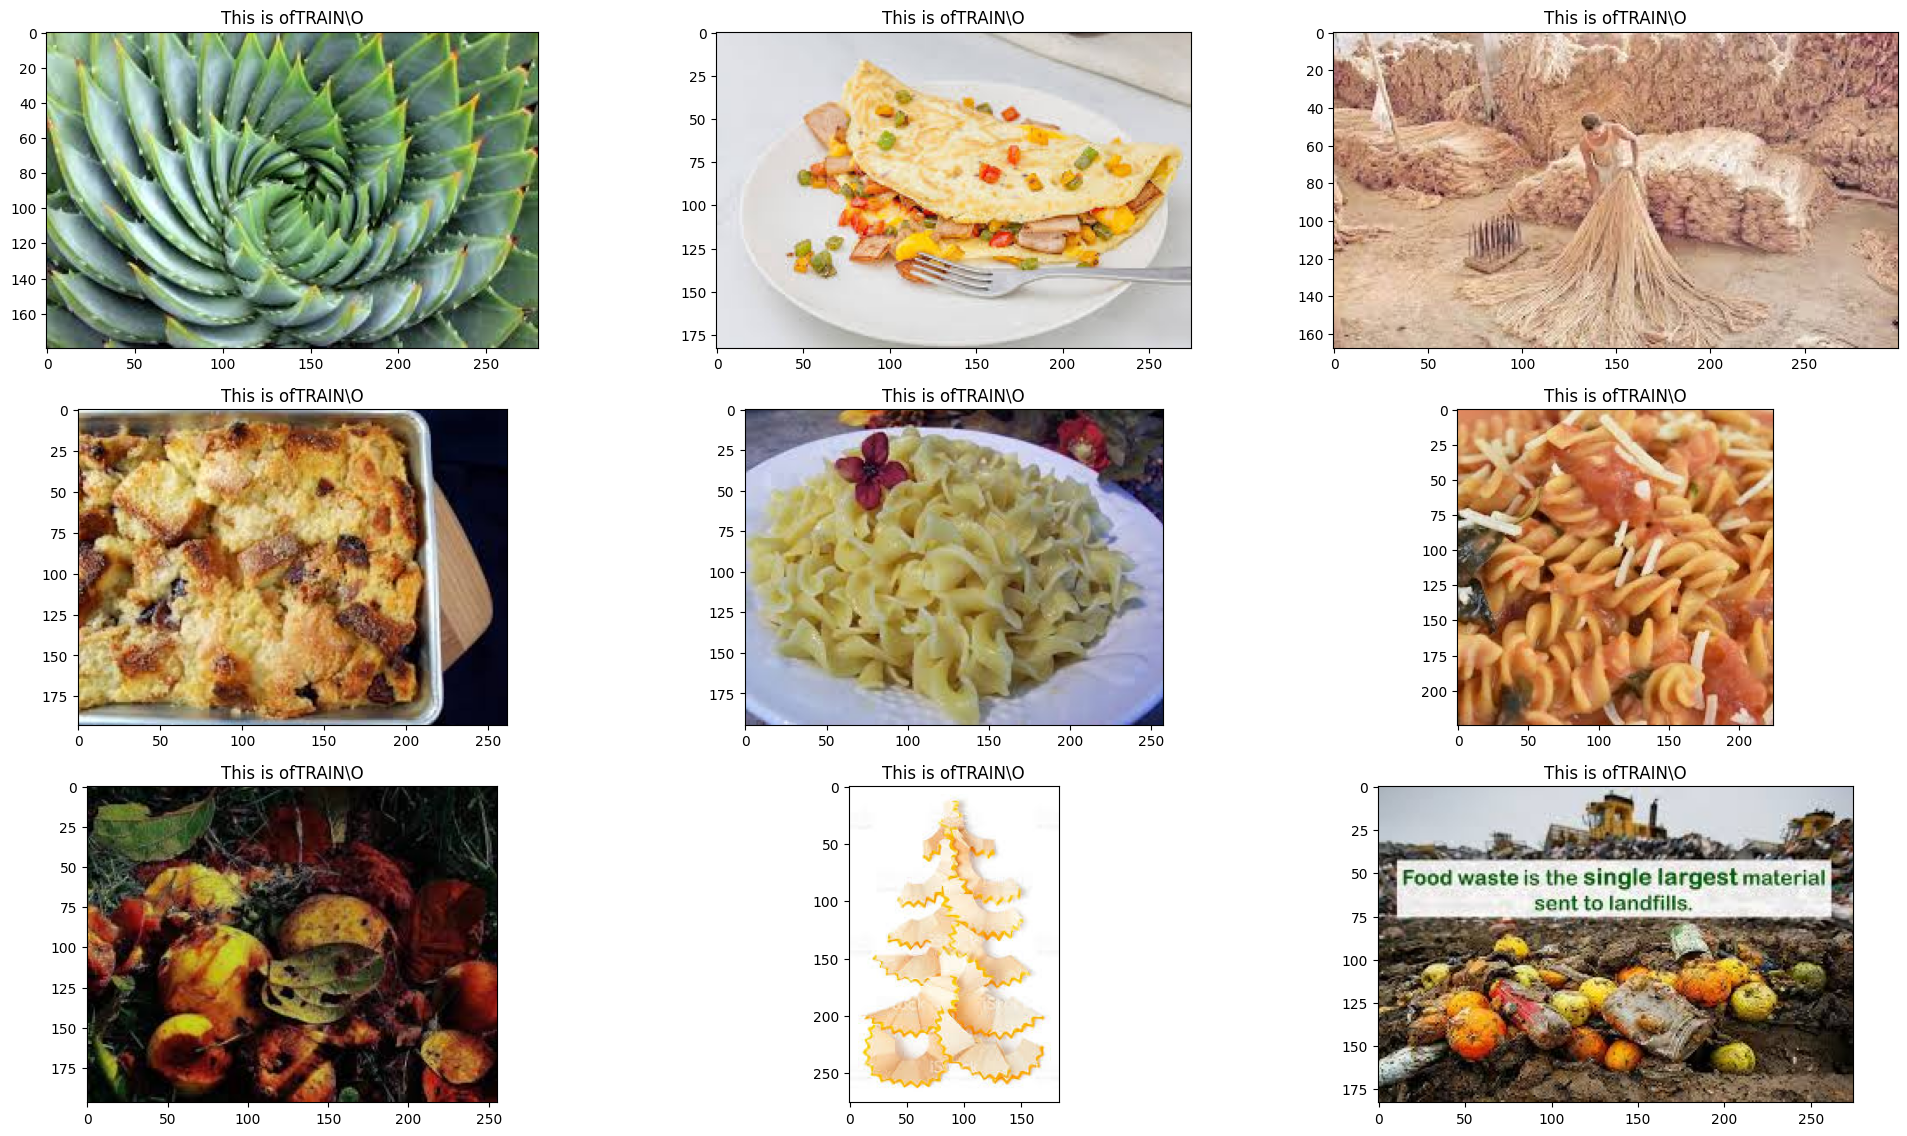

In [10]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3, (i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of{0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [11]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 64

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224 , 224),
    batch_size = batch_size,
    color_mode="rgb",
    class_mode = "categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224 , 224),
    batch_size = batch_size,
    color_mode="rgb",
    class_mode = "categorical"
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [17]:
hist = model.fit(
    train_generator,
    epochs=15,
    validation_data = test_generator
 )

Epoch 1/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 522s 1s/step - accuracy: 0.9052 - loss: 0.2473 - val_accuracy: 0.9121 - val_loss: 0.2604
Epoch 2/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 528s 1s/step - accuracy: 0.9253 - loss: 0.1939 - val_accuracy: 0.8743 - val_loss: 0.3428
Epoch 3/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 517s 1s/step - accuracy: 0.9453 - loss: 0.1553 - val_accuracy: 0.8902 - val_loss: 0.3797
Epoch 4/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 526s 1s/step - accuracy: 0.9557 - loss: 0.1239 - val_accuracy: 0.9069 - val_loss: 0.3316
Epoch 5/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 519s 1s/step - accuracy: 0.9680 - loss: 0.0939 - val_accuracy: 0.8957 - val_loss: 0.4381
Epoch 6/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 523s 1s/step - accuracy: 0.9766 - loss: 0.0742 - val_accuracy: 0.8902 - val_loss: 0.4444
Epoch 7/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 520s 1s/step - accuracy: 0.9822 - loss: 0.0579 - val_accuracy: 0.8973 - val_loss: 0.4976
Epoch 8/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 518s 1s/step - accuracy: 0.9819 - loss: 0.0533 - val_accu

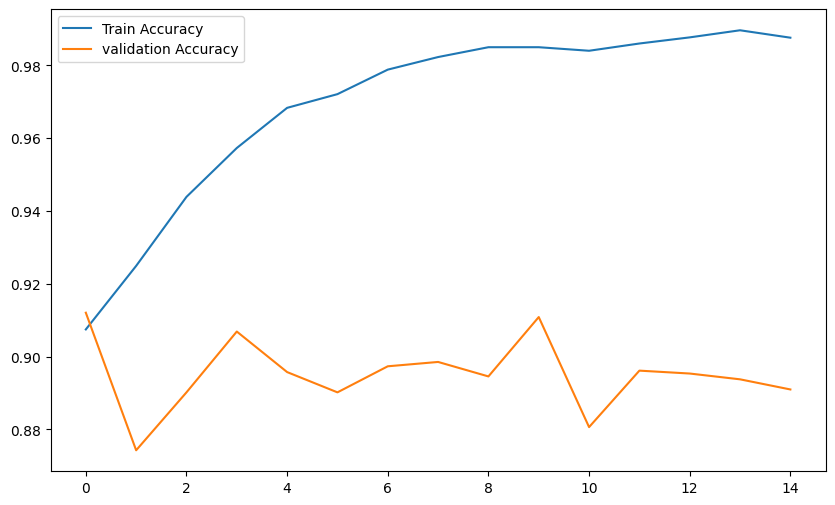

In [20]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='validation Accuracy')
plt.legend()
plt.show()

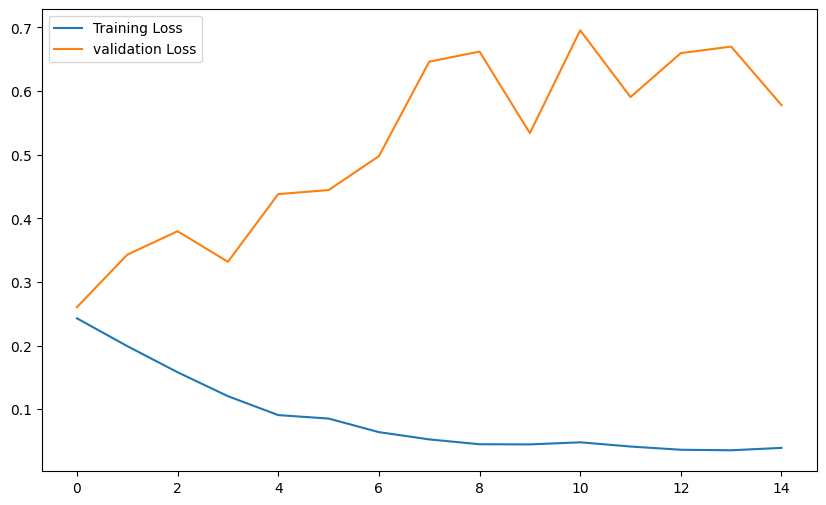

In [21]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='validation Loss')
plt.legend()
plt.show()

In [23]:
def predict_fun(img):
    plt.figure(figsize=(10, 4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BRG2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224, 3])
    result = np.argmax(model.predict(img))
    if result == 0:
        print('The image shown is Recyclable Waste')
    elif result == 1:
        print('The image shown is Organic Waste')

In [ ]:
test_image = cv2.imread('')